In [2]:
!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 8.1MB/s 
     |████████████████████████████████| 63.9MB 59kB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 389kB 48.5MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 7.0MB 35.2MB/s 
     |████████████████████████████████| 1.6MB 48.0MB/s 
     |████████████████████████████████| 266kB 39.1MB/s 
     |████████████████████████████████| 3.0MB 45.8MB/s 
     |████████████████████████████████| 133kB 49.0MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 235kB 41.4MB/s 
     |████████████████████████████████| 2.1MB 39.9MB/s 
     |████████████████████████████████| 552kB 40.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 6.2MB 44.3MB/s 
   

In [0]:
import pandas as pd
from pycaret.classification import *

In [0]:
url = 'https://raw.githubusercontent.com/nukemecha/Project3/master/cleaned_2011.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp__1 year,emp__10+ years,emp__2 years,emp__3 years,emp__4 years,emp__5 years,emp__6 years,emp__7 years,emp__8 years,emp__9 years,emp__< 1 year,ho__MORTGAGE,ho__OTHER,ho__OWN,ho__RENT,ver__Not Verified,ver__Source Verified,ver__Verified
0,5000,5000,4975.0,10.65,162.87,24000.0,Fully Paid,27.65,0,1,0.0,0.0,3,0,13648,83.7,9,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0,5,0.0,0.0,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0,0.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,2400,2400,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0,2,0.0,0.0,2,0,2956,98.5,10,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0,1,35.0,0.0,10,0,5598,21.0,37,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,3000,3000,3000.0,12.69,67.79,80000.0,Current,17.94,0,0,38.0,0.0,15,0,27783,53.9,38,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0,0.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
df=df.replace(to_replace="Fully Paid",value= 1)
df=df.replace(to_replace="Charged Off",value= 0)
df=df.replace(to_replace="Current", value = 1)
df=df.replace(to_replace="Default",value= 0)
df=df.replace(to_replace="Late (31-120 days)",value= 0)
df=df.replace(to_replace="In Grace Period",value= 0)
df=df.replace(to_replace="Late (16-30 days)",value= 0)


In [5]:
df['loan_status'].unique()

array([1, 0])

In [0]:
df = df.rename(columns={'emp__< 1 year': 'emp__less1year', 'emp__10+ years': 'emp__10years'})

In [7]:
exp_clf = setup(df, target = 'loan_status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7772
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(21721, 56)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,31
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.993900,0.994000,0.999300,0.993600,0.996400,0.976100
1,Light Gradient Boosting Machine,0.992200,0.997200,0.999900,0.991000,0.995400,0.969200
2,CatBoost Classifier,0.990800,0.996700,0.999900,0.989300,0.994600,0.963300
3,Quadratic Discriminant Analysis,0.989800,0.985500,0.993600,0.994300,0.994000,0.960500
4,Extreme Gradient Boosting,0.989300,0.996800,0.999900,0.987700,0.993800,0.957300
5,Random Forest Classifier,0.989200,0.988700,0.999500,0.988000,0.993700,0.956900
6,Gradient Boosting Classifier,0.988700,0.996200,0.999600,0.987200,0.993400,0.954700
7,Ada Boost Classifier,0.988200,0.994600,0.999500,0.986800,0.993100,0.952600
8,SVM - Linear Kernel,0.986100,0.000000,0.993700,0.990000,0.991800,0.947100
9,Decision Tree Classifier,0.984000,0.969200,0.990500,0.990700,0.990600,0.938000


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9921,0.9940,0.9984,0.9923,0.9954,0.9689
1,0.9901,0.9912,1.0000,0.9885,0.9942,0.9607
2,0.9928,0.9899,1.0000,0.9915,0.9958,0.9714
3,0.9961,0.9961,0.9984,0.9969,0.9977,0.9846
4,0.9961,0.9993,0.9977,0.9977,0.9977,0.9846
5,0.9941,0.9943,0.9992,0.9938,0.9965,0.9767
6,0.9954,0.9914,1.0000,0.9946,0.9973,0.9819
7,0.9947,0.9966,0.9992,0.9946,0.9969,0.9794
8,0.9934,0.9915,1.0000,0.9923,0.9961,0.9740
9,0.9947,0.9956,1.0000,0.9938,0.9969,0.9793


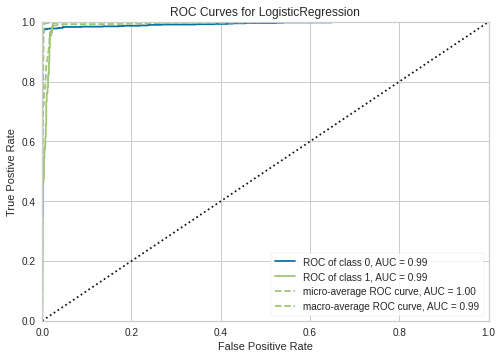

In [12]:
plot_model(lr)

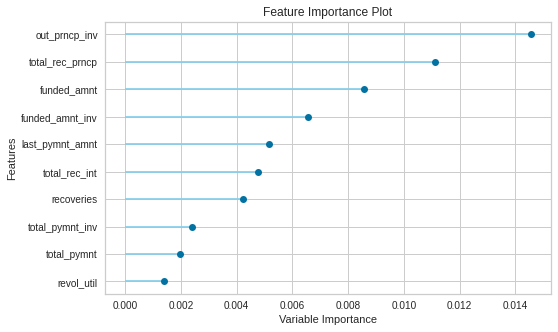

In [13]:
plot_model(lr, plot='feature')

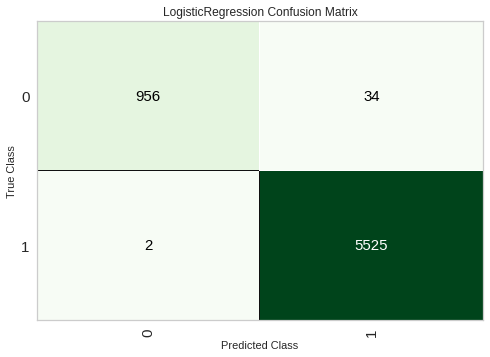

In [14]:
plot_model(lr, plot='confusion_matrix')

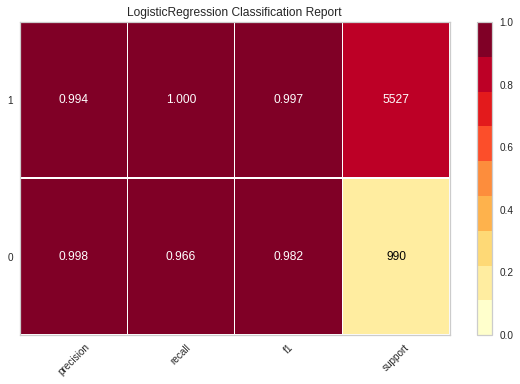

In [15]:
plot_model(lr, plot='class_report')

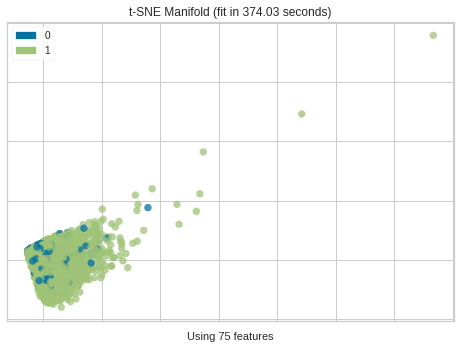

In [16]:
plot_model(lr, plot='manifold')

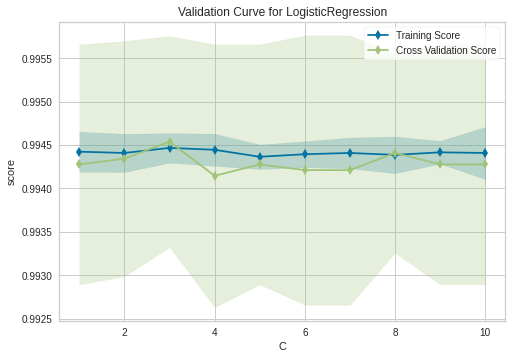

In [17]:
plot_model(lr, plot='vc')

In [0]:
final_lr = finalize_model(lr)